In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('UNESCO_school_closures_database.xlsx')

## data/column name cleaning

In [3]:
data.head()

,Date,Country ID,Country,Region Type 1,Region 1,Region Type 2,Region 2,Region Type 3,Region 3,Status,"Partially Open Type (As of November 30, 2021)",Enrolment (Pre-Primary to Tertiary),Teachers (Pre-Primary to Upper Secondary),School Age Population (Pre-Primary to Upper Secondary),Distance learning modalities (TV),Distance learning modalities (Radio),Distance learning modalities (Online),Distance learning modalities (Global),Weeks partially open,Weeks fully closed
0,2020-02-16 00:00:00,ABW,Aruba,EC,ECLAC: All countries (UNSDCode:98300),SDG,SDG: Latin America and the Caribbean,WB Income,WB: High income (July 2020),Fully open,NaN,21004.0,1211.07666,16731.0,No,No,Yes,Online,8.0,5.0
1,2020-02-17 00:00:00,ABW,Aruba,EC,ECLAC: All countries (UNSDCode:98300),SDG,SDG: Latin America and the Caribbean,WB Income,WB: High income (July 2020),Fully open,NaN,21004.0,1211.07666,16731.0,No,No,Yes,Online,8.0,5.0
2,2020-02-18 00:00:00,ABW,Aruba,EC,ECLAC: All countries (UNSDCode:98300),SDG,SDG: Latin America and the Caribbean,WB Income,WB: High income (July 2020),Fully open,NaN,21004.0,1211.07666,16731.0,No,No,Yes,Online,8.0,5.0
3,2020-02-19 00:00:00,ABW,Aruba,EC,ECLAC: All countries (UNSDCode:98300),SDG,SDG: Latin America and the Caribbean,WB Income,WB: High income (July 2020),Fully open,NaN,21004.0,1211.07666,16731.0,No,No,Yes,Online,8.0,5.0
4,2020-02-20 00:00:00,ABW,Aruba,EC,ECLAC: All countries (UNSDCode:98300),SDG,SDG: Latin America and the Caribbean,WB Income,WB: High income (July 2020),Fully open,NaN,21004.0,1211.07666,16731.0,No,No,Yes,Online,8.0,5.0


In [4]:
#lower case column names+underscore
n_cols = []
for i in range(len(data.columns)):
    n_cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = n_cols
data.head(1)

,date,country_id,country,region_type_1,region_1,region_type_2,region_2,region_type_3,region_3,status,"partially_open_type_(as_of_november_30,_2021)",enrolment_(pre-primary_to_tertiary),teachers_(pre-primary_to_upper_secondary),school_age_population_(pre-primary_to_upper_secondary),distance_learning_modalities_(tv),distance_learning_modalities_(radio),distance_learning_modalities_(online),distance_learning_modalities_(global),weeks_partially_open,weeks_fully_closed
0,2020-02-16 00:00:00,ABW,Aruba,EC,ECLAC: All countries (UNSDCode:98300),SDG,SDG: Latin America and the Caribbean,WB Income,WB: High income (July 2020),Fully open,NaN,21004.0,1211.07666,16731.0,No,No,Yes,Online,8.0,5.0


In [5]:
#rename lenghty columns
data = data.rename(columns={'partially_open_type_(as_of_november_30,_2021)':'partially_open_type',
                            'enrolment_(pre-primary_to_tertiary)':'enrolment', 
                            'teachers_(pre-primary_to_upper_secondary)':'teachers',
                            'school_age_population_(pre-primary_to_upper_secondary)':'school_age_population',
                            'distance_learning_modalities_(tv)':'distance_tv',
                            'distance_learning_modalities_(radio)':'distance_radio',
                            'distance_learning_modalities_(online)':'distance_online',
                            'distance_learning_modalities_(global)':'distance_global',
                           })
data.head(1)

,date,country_id,country,region_type_1,region_1,region_type_2,region_2,region_type_3,region_3,status,partially_open_type,enrolment,teachers,school_age_population,distance_tv,distance_radio,distance_online,distance_global,weeks_partially_open,weeks_fully_closed
0,2020-02-16 00:00:00,ABW,Aruba,EC,ECLAC: All countries (UNSDCode:98300),SDG,SDG: Latin America and the Caribbean,WB Income,WB: High income (July 2020),Fully open,NaN,21004.0,1211.07666,16731.0,No,No,Yes,Online,8.0,5.0


In [6]:
#check for NaNs
data.isna().sum()
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),2)*100) #division not multiplication like in instructions

nulls_df = nulls_df.reset_index()

nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,date,0.0
1,country_id,0.0
2,country,0.0
3,region_type_1,4.0
4,region_1,4.0
5,region_type_2,1.0
6,region_2,1.0
7,region_type_3,4.0
8,region_3,4.0
9,status,0.0


In [7]:
data.partially_open_type.value_counts(dropna=False)

NaN                      108915
Regions                   11645
Grades                     5480
Hybrid                     5480
Regions/Hybrid             5480
Grades/Hybrid              2740
Regions/Grades/Hybrid      2055
Gender                      685
Regions/Grades              685
Regions                     685
Name: partially_open_type, dtype: int64

In [8]:
data.status.value_counts(dropna=False)

Fully open                54004
Academic break            33312
Closed due to COVID-19    28398
Partially open            28136
Name: status, dtype: int64

it seems like these are dfferent types of partially school closure: some grades go other not, some regions are allowed other not and so on, in all cases if the schools are not in the partially open state the column partially_open_type it s NaN value

In [9]:
#select all rows where school was not partially open and see if it matches with Nans in the partially closed
data[data['status'] != 'Partially open'].shape


(115714, 20)

there are still rows indicating partially open but not having a value in the partially_open_type column, where probably the information is not given

##### united nations (EC) Econommic Comission divided into 5: Europe, Asia, Asia & Pacific, Latin America & Caribbean, Western asia

In [10]:
#look at region types 1
display(data.region_type_1.value_counts(dropna=False))
display(data.region_1.value_counts(dropna=False))

EC     138370
NaN      5480
Name: region_type_1, dtype: int64

ECE: All countries (UNSDCode:98200)      38360
ECA: All countries (UNSDCode:98100)      36305
ESCAP: All countries (UNSDCode:98400)    28085
ECLAC: All countries (UNSDCode:98300)    27400
ESCWA: All countries (UNSDCode:98500)     8220
NaN                                       5480
Name: region_1, dtype: int64

In [11]:
#rename values to understandable ones
data.region_1=data.region_1.str.strip()
data.region_1 = data.region_1.replace('ECE: All countries (UNSDCode:98200)', 'Europe')
data.region_1 = data.region_1.replace('ECA: All countries (UNSDCode:98100)', 'Asia')
data.region_1 = data.region_1.replace('ESCAP: All countries (UNSDCode:98400)', 'Asia_Pacific')
data.region_1 = data.region_1.replace('ECLAC: All countries (UNSDCode:98300)', 'LatinAmerica_Caribbean')
data.region_1 = data.region_1.replace('ESCWA: All countries (UNSDCode:98500)', 'Western_Asia')

In [12]:
display(data.region_1.value_counts(dropna=False))

Europe                    38360
Asia                      36305
Asia_Pacific              28085
LatinAmerica_Caribbean    27400
Western_Asia               8220
NaN                        5480
Name: region_1, dtype: int64

##### countries by SDG (sustainable-development-goals) regions: standard country or area codes for statistical use

In [13]:
#look at region types 2
display(data.region_type_2.value_counts(dropna=False))
display(data.region_2.value_counts(dropna=False))

SDG    142480
NaN      1370
Name: region_type_2, dtype: int64

SDG: Northern America and Europe         34250
SDG: Africa (Sub-Saharan)                32195
SDG: Latin America and the Caribbean     27400
SDG: Western Asia and Northern Africa    16440
SDG: Oceania                             11645
SDG: Asia (Eastern and South-eastern)    10960
SDG: Asia (Central and Southern)          9590
NaN                                       1370
Name: region_2, dtype: int64

In [14]:
#shorten value names
data.region_2=data.region_2.str.replace(r"SDG:","")
data.region_2=data.region_2.str.strip()

In [15]:
display(data.region_2.value_counts(dropna=False))

Northern America and Europe         34250
Africa (Sub-Saharan)                32195
Latin America and the Caribbean     27400
Western Asia and Northern Africa    16440
Oceania                             11645
Asia (Eastern and South-eastern)    10960
Asia (Central and Southern)          9590
NaN                                  1370
Name: region_2, dtype: int64

##### World bank coutry income groups

In [16]:
#look at region types 3
display(data.region_type_3.value_counts(dropna=False))
display(data.region_3.value_counts(dropna=False))

WB Income    138370
NaN            5480
Name: region_type_3, dtype: int64

WB: High income (July 2020)            47950
WB: Upper middle income (July 2020)    36990
WB: Lower middle income (July 2020)    33565
WB: Low income (July 2020)             19865
NaN                                     5480
Name: region_3, dtype: int64

In [17]:
#shorten value names: erase (July 2020)
data.region_3=data.region_3.str.replace(r"\(.*\)","")
data.region_3=data.region_3.str.replace(r"WB:","")
#remove empy spaces
data.region_3=data.region_3.str.strip()

<ipython-input-17-5fa3b93a191d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.region_3=data.region_3.str.replace(r"\(.*\)","")


In [18]:
display(data.region_3.value_counts(dropna=False))

High income            47950
Upper middle income    36990
Lower middle income    33565
Low income             19865
NaN                     5480
Name: region_3, dtype: int64

In [19]:
region_3_nans=data[data['region_3'].isnull()]
region_3_nans.country.unique()

array(['Anguilla', 'Cook Islands', 'Curaçao', 'Montserrat', 'Niue',
       'Svalbard', 'São Tomé and Príncipe', 'Tokelau'], dtype=object)

In [20]:
#exclude the 8 countries from data which are not sorted into a world bank income group
data=data.dropna(subset=['region_3']) 

In [21]:
display(data.region_3.value_counts(dropna=False))

High income            47950
Upper middle income    36990
Lower middle income    33565
Low income             19865
Name: region_3, dtype: int64

In [22]:
#check for NaNs
data.isna().sum()
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),2)*100) #division not multiplication like in instructions

nulls_df = nulls_df.reset_index()

nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,date,0.0
1,country_id,0.0
2,country,0.0
3,region_type_1,2.0
4,region_1,2.0
5,region_type_2,0.0
6,region_2,0.0
7,region_type_3,0.0
8,region_3,0.0
9,status,0.0


In [23]:
# only region 1 has some Nans left
region_1_nans=data[data['region_1'].isnull()]
region_1_nans.country.unique()

array(['Bermuda', 'Faroe Islands', 'Gibraltar', 'Greenland'], dtype=object)

In [24]:
#these countries are not in the EC regions but are covered in the two other region types, and can herefore stay
#therefore checking of NaNs finihed

##### look at data types

In [25]:
data.dtypes

date                      object
country_id                object
country                   object
region_type_1             object
region_1                  object
region_type_2             object
region_2                  object
region_type_3             object
region_3                  object
status                    object
partially_open_type       object
enrolment                float64
teachers                 float64
school_age_population    float64
distance_tv               object
distance_radio            object
distance_online           object
distance_global           object
weeks_partially_open     float64
weeks_fully_closed       float64
dtype: object

####  solving the date column excel formating issue

In [26]:
# convert date to date time format
#data['date']=pd.to_datetime(data['date']) --> this shows an error since not all rows have a common date format

data.tail() #as seen here in tehe date format its just a number
#excel format that starts at 1900/01/01 with 1 and increases with each day

,date,country_id,country,region_type_1,region_1,region_type_2,region_2,region_type_3,region_3,status,partially_open_type,enrolment,teachers,school_age_population,distance_tv,distance_radio,distance_online,distance_global,weeks_partially_open,weeks_fully_closed
143845,44557,ZWE,Zimbabwe,EC,Asia,SDG,Africa (Sub-Saharan),WB Income,Lower middle income,Academic break,NaN,3994773.0,124750.203125,5912714.0,No,Yes,Yes,Online + Radio,34.0,10.0
143846,44558,ZWE,Zimbabwe,EC,Asia,SDG,Africa (Sub-Saharan),WB Income,Lower middle income,Academic break,NaN,3994773.0,124750.203125,5912714.0,No,Yes,Yes,Online + Radio,34.0,10.0
143847,44559,ZWE,Zimbabwe,EC,Asia,SDG,Africa (Sub-Saharan),WB Income,Lower middle income,Academic break,NaN,3994773.0,124750.203125,5912714.0,No,Yes,Yes,Online + Radio,34.0,10.0
143848,44560,ZWE,Zimbabwe,EC,Asia,SDG,Africa (Sub-Saharan),WB Income,Lower middle income,Academic break,NaN,3994773.0,124750.203125,5912714.0,No,Yes,Yes,Online + Radio,34.0,10.0
143849,44561,ZWE,Zimbabwe,EC,Asia,SDG,Africa (Sub-Saharan),WB Income,Lower middle income,Academic break,NaN,3994773.0,124750.203125,5912714.0,No,Yes,Yes,Online + Radio,34.0,10.0


In [27]:
##https://stackoverflow.com/questions/29387137/how-to-convert-a-given-ordinal-number-from-excel-to-a-date
#found the solution heren since I had no idea how to solve this very specific issue
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal, _epoch0=datetime(1899, 12, 31)): #this is the starting date
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (_epoch0 + timedelta(days=ordinal)).replace(microsecond=0)

In [28]:
#https://stackoverflow.com/questions/48180685/changing-all-dates-to-standard-date-time-in-dataframe
#also a soruce that helped me further
m=data['date'].astype(str).str.isdigit() #find the rows which have a number instead of already a date

In [29]:
#apply function only on values ind ate that have this weird number
data.loc[m, 'date'] = data.loc[m, 'date'].astype(int).apply(from_excel_ordinal)

In [30]:
data.tail()

,date,country_id,country,region_type_1,region_1,region_type_2,region_2,region_type_3,region_3,status,partially_open_type,enrolment,teachers,school_age_population,distance_tv,distance_radio,distance_online,distance_global,weeks_partially_open,weeks_fully_closed
143845,2021-12-27 00:00:00,ZWE,Zimbabwe,EC,Asia,SDG,Africa (Sub-Saharan),WB Income,Lower middle income,Academic break,NaN,3994773.0,124750.203125,5912714.0,No,Yes,Yes,Online + Radio,34.0,10.0
143846,2021-12-28 00:00:00,ZWE,Zimbabwe,EC,Asia,SDG,Africa (Sub-Saharan),WB Income,Lower middle income,Academic break,NaN,3994773.0,124750.203125,5912714.0,No,Yes,Yes,Online + Radio,34.0,10.0
143847,2021-12-29 00:00:00,ZWE,Zimbabwe,EC,Asia,SDG,Africa (Sub-Saharan),WB Income,Lower middle income,Academic break,NaN,3994773.0,124750.203125,5912714.0,No,Yes,Yes,Online + Radio,34.0,10.0
143848,2021-12-30 00:00:00,ZWE,Zimbabwe,EC,Asia,SDG,Africa (Sub-Saharan),WB Income,Lower middle income,Academic break,NaN,3994773.0,124750.203125,5912714.0,No,Yes,Yes,Online + Radio,34.0,10.0
143849,2021-12-31 00:00:00,ZWE,Zimbabwe,EC,Asia,SDG,Africa (Sub-Saharan),WB Income,Lower middle income,Academic break,NaN,3994773.0,124750.203125,5912714.0,No,Yes,Yes,Online + Radio,34.0,10.0


In [31]:
data['date']=pd.to_datetime(data['date'])


In [32]:
data.dtypes

date                     datetime64[ns]
country_id                       object
country                          object
region_type_1                    object
region_1                         object
region_type_2                    object
region_2                         object
region_type_3                    object
region_3                         object
status                           object
partially_open_type              object
enrolment                       float64
teachers                        float64
school_age_population           float64
distance_tv                      object
distance_radio                   object
distance_online                  object
distance_global                  object
weeks_partially_open            float64
weeks_fully_closed              float64
dtype: object

In [33]:
# we bascially dont need region type columns, because theyall have the same value for each type
data=data.drop(['region_type_1','region_type_2','region_type_3'], axis=1) 

In [34]:
data.head()

,date,country_id,country,region_1,region_2,region_3,status,partially_open_type,enrolment,teachers,school_age_population,distance_tv,distance_radio,distance_online,distance_global,weeks_partially_open,weeks_fully_closed
0,2020-02-16,ABW,Aruba,LatinAmerica_Caribbean,Latin America and the Caribbean,High income,Fully open,NaN,21004.0,1211.07666,16731.0,No,No,Yes,Online,8.0,5.0
1,2020-02-17,ABW,Aruba,LatinAmerica_Caribbean,Latin America and the Caribbean,High income,Fully open,NaN,21004.0,1211.07666,16731.0,No,No,Yes,Online,8.0,5.0
2,2020-02-18,ABW,Aruba,LatinAmerica_Caribbean,Latin America and the Caribbean,High income,Fully open,NaN,21004.0,1211.07666,16731.0,No,No,Yes,Online,8.0,5.0
3,2020-02-19,ABW,Aruba,LatinAmerica_Caribbean,Latin America and the Caribbean,High income,Fully open,NaN,21004.0,1211.07666,16731.0,No,No,Yes,Online,8.0,5.0
4,2020-02-20,ABW,Aruba,LatinAmerica_Caribbean,Latin America and the Caribbean,High income,Fully open,NaN,21004.0,1211.07666,16731.0,No,No,Yes,Online,8.0,5.0


#### look at nuemrical values

In [35]:
data.describe()

,enrolment,teachers,school_age_population,weeks_partially_open,weeks_fully_closed
count,1.383700e+05,1.383700e+05,1.383700e+05,138370.000000,138370.000000
mean,7.630836e+06,3.847972e+05,9.220307e+06,19.712871,19.584158
std,2.762262e+07,1.440454e+06,3.285736e+07,14.232100,15.942570
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.521770e+05,1.436500e+04,2.658800e+05,10.000000,6.000000
50%,1.478388e+06,8.777300e+04,1.734024e+06,16.000000,17.000000
75%,6.031019e+06,2.453180e+05,7.366133e+06,27.000000,29.000000
max,2.948931e+08,1.562502e+07,3.688164e+08,64.000000,74.000000


#### take care of zero (0.0) values in some columns

In [36]:
#enrolment and teachers minimum is zero as well as school age population, 
#which in alle cases doesnt make logical sense that some countries dont have any teachers or school kids

<AxesSubplot:>

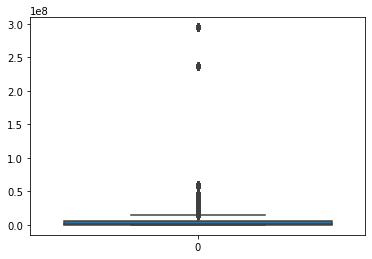

In [37]:
sns.boxplot(data=data['enrolment'])

In [38]:
zero_enrolement=data.loc[data['enrolment'] == 0]
zero_enrolement

,date,country_id,country,region_1,region_2,region_3,status,partially_open_type,enrolment,teachers,school_age_population,distance_tv,distance_radio,distance_online,distance_global,weeks_partially_open,weeks_fully_closed
44525,2020-02-16,FRO,Faroe Islands,NaN,Northern America and Europe,High income,Fully open,NaN,0.0,0.0,0.0,No,No,No,None,6.0,4.0
44526,2020-02-17,FRO,Faroe Islands,NaN,Northern America and Europe,High income,Fully open,NaN,0.0,0.0,0.0,No,No,No,None,6.0,4.0
44527,2020-02-18,FRO,Faroe Islands,NaN,Northern America and Europe,High income,Fully open,NaN,0.0,0.0,0.0,No,No,No,None,6.0,4.0
44528,2020-02-19,FRO,Faroe Islands,NaN,Northern America and Europe,High income,Fully open,NaN,0.0,0.0,0.0,No,No,No,None,6.0,4.0
44529,2020-02-20,FRO,Faroe Islands,NaN,Northern America and Europe,High income,Fully open,NaN,0.0,0.0,0.0,No,No,No,None,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54110,2021-12-27,GRL,Greenland,NaN,Northern America and Europe,High income,Academic break,NaN,0.0,0.0,0.0,No,No,Yes,Online,3.0,1.0
54111,2021-12-28,GRL,Greenland,NaN,Northern America and Europe,High income,Academic break,NaN,0.0,0.0,0.0,No,No,Yes,Online,3.0,1.0
54112,2021-12-29,GRL,Greenland,NaN,Northern America and Europe,High income,Academic break,NaN,0.0,0.0,0.0,No,No,Yes,Online,3.0,1.0
54113,2021-12-30,GRL,Greenland,NaN,Northern America and Europe,High income,Academic break,NaN,0.0,0.0,0.0,No,No,Yes,Online,3.0,1.0


In [39]:
zero_enrolement['country'].unique() # 2 countries dont have students, teachers or population of school age
# probably the numbers of school kids on at least faroe islands is very low

array(['Faroe Islands', 'Greenland'], dtype=object)

In [40]:
data.drop(data[data['enrolment'] == 0].index, inplace= True) # drop those rows with the 2 countries

In [41]:
data.describe() #now only rows with school age population that are zero
#weeks partially open and fully closed can be zero in some countries

,enrolment,teachers,school_age_population,weeks_partially_open,weeks_fully_closed
count,1.370000e+05,1.370000e+05,1.370000e+05,137000.000000,137000.000000
mean,7.707144e+06,3.886452e+05,9.312510e+06,19.865000,19.755000
std,2.774979e+07,1.447122e+06,3.300823e+07,14.220346,15.929119
min,3.046000e+03,1.010000e+02,0.000000e+00,0.000000,0.000000
25%,2.867375e+05,1.530651e+04,2.905442e+05,10.000000,6.000000
50%,1.496758e+06,8.923423e+04,1.749438e+06,16.500000,17.000000
75%,6.128058e+06,2.457069e+05,7.394957e+06,27.250000,29.000000
max,2.948931e+08,1.562502e+07,3.688164e+08,64.000000,74.000000


In [42]:
zero_school_age_population=data.loc[data['school_age_population'] == 0]
display(zero_school_age_population)
print(zero_school_age_population['country'].unique())

,date,country_id,country,region_1,region_2,region_3,status,partially_open_type,enrolment,teachers,school_age_population,distance_tv,distance_radio,distance_online,distance_global,weeks_partially_open,weeks_fully_closed
3425,2020-02-16,AND,Andorra,Europe,Northern America and Europe,High income,Fully open,NaN,11012.0,928.40387,0.0,No,No,No,None,15.0,1.0
3426,2020-02-17,AND,Andorra,Europe,Northern America and Europe,High income,Fully open,NaN,11012.0,928.40387,0.0,No,No,No,None,15.0,1.0
3427,2020-02-18,AND,Andorra,Europe,Northern America and Europe,High income,Fully open,NaN,11012.0,928.40387,0.0,No,No,No,None,15.0,1.0
3428,2020-02-19,AND,Andorra,Europe,Northern America and Europe,High income,Fully open,NaN,11012.0,928.40387,0.0,No,No,No,None,15.0,1.0
3429,2020-02-20,AND,Andorra,Europe,Northern America and Europe,High income,Fully open,NaN,11012.0,928.40387,0.0,No,No,No,None,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80140,2021-12-27,MCO,Monaco,Europe,Northern America and Europe,High income,Academic break,NaN,6364.0,696.00000,0.0,No,No,No,None,6.0,6.0
80141,2021-12-28,MCO,Monaco,Europe,Northern America and Europe,High income,Academic break,NaN,6364.0,696.00000,0.0,No,No,No,None,6.0,6.0
80142,2021-12-29,MCO,Monaco,Europe,Northern America and Europe,High income,Academic break,NaN,6364.0,696.00000,0.0,No,No,No,None,6.0,6.0
80143,2021-12-30,MCO,Monaco,Europe,Northern America and Europe,High income,Academic break,NaN,6364.0,696.00000,0.0,No,No,No,None,6.0,6.0


['Andorra' 'Japan' 'Lebanon' 'Monaco']


In [43]:
# I leave these countries for now in....if i work with school age population later I would need to clean it

### save cleaned data as csv file

In [375]:
data.to_csv('cleaned_UNESCO_school_closures_database.csv', index=False)